# Cross Validation and Model Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn import datasets 
from sklearn import model_selection, metrics
from sklearn import tree
import seaborn as sns

## Load Data

In [3]:
iris =  datasets.load_iris()
tmp =  {name: iris.data[:,i] for i, name in enumerate(iris.feature_names)}
tmp["target"] = [iris.target_names[i] for i in iris.target]
iris_df = pd.DataFrame(tmp)
iris_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris_df.drop(["target"], axis=1) # Seperate data from type
y = iris_df["target"] # Type of flowers
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

## Train/Test Split

In [5]:
#model_selection.train_test_split?
#(X_train, X_test) = model_selection.train_test_split(X, test_size=1/3.)
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/3.)

In [6]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (100, 4) (50, 4)


In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = clf.predict(X_test)

### Accuracy 
is one of the simplest and most commonly used metrics for evaluating a classification model. It measures the proportion of correct predictions out of the total number of predictions.

Accuracy = TP+TN / TP+TN+FP+FN

In [9]:
metrics.accuracy_score(y_test, y_pred)

0.94

### Precision 
is the ratio of correctly predicted positive instances to the total instances that were predicted as positive. It answers the question: Of all the instances the model predicted as positive, how many were actually positive?

Precision = True Positives (TP) / True Positives (TP) + False Positives (FP)

In [10]:
metrics.precision_score(y_test, y_pred, average="weighted")

0.9415

### Recall 
(also known as Sensitivity or True Positive Rate) is the proportion of actual positive instances that were correctly predicted by the model. It measures how well the model identifies all relevant instances from a specific class.

Recall = True Positives (TP) / True Positives (TP) + False Negatives (FN)
​

In [11]:
metrics.recall_score(y_test, y_pred, average="weighted")

0.94

### F1 Score
The F1 score is the harmonic mean of precision and recall. It is useful when you need a balance between precision and recall, especially when dealing with imbalanced datasets (where one class is much more frequent than another).

F1 Score = 2 ⋅ (Precision⋅Recall / Precision+Recall)

In [12]:
metrics.f1_score(y_test, y_pred, average="weighted")

0.9402360346184108

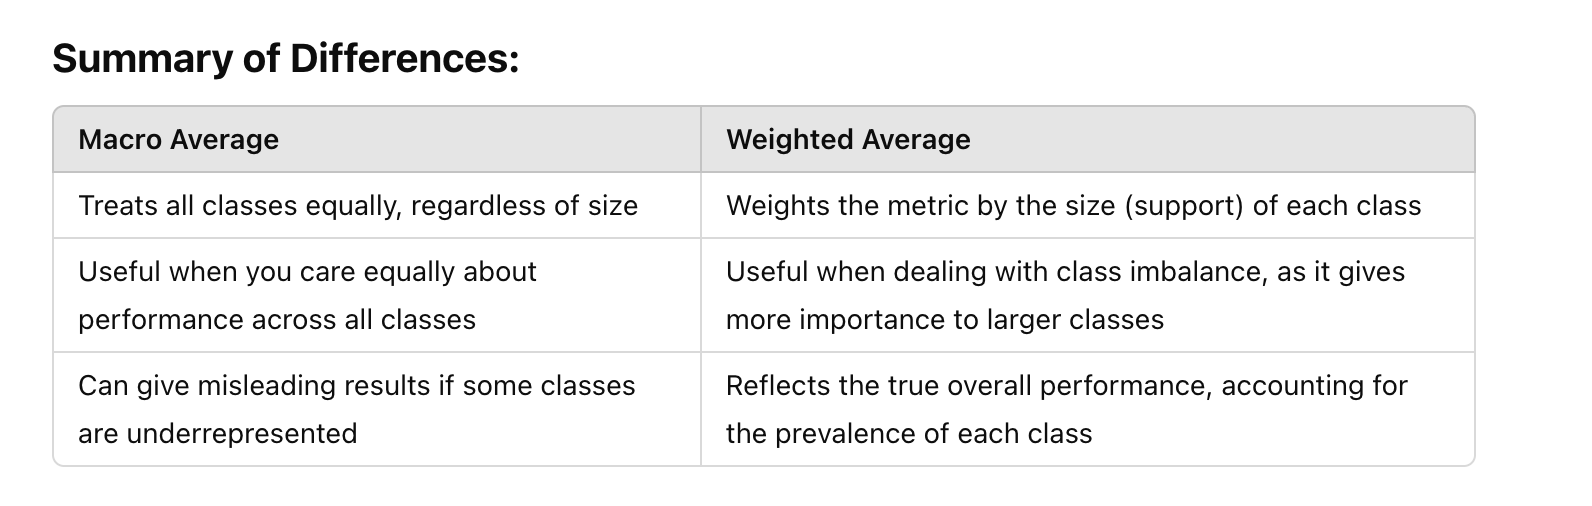

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

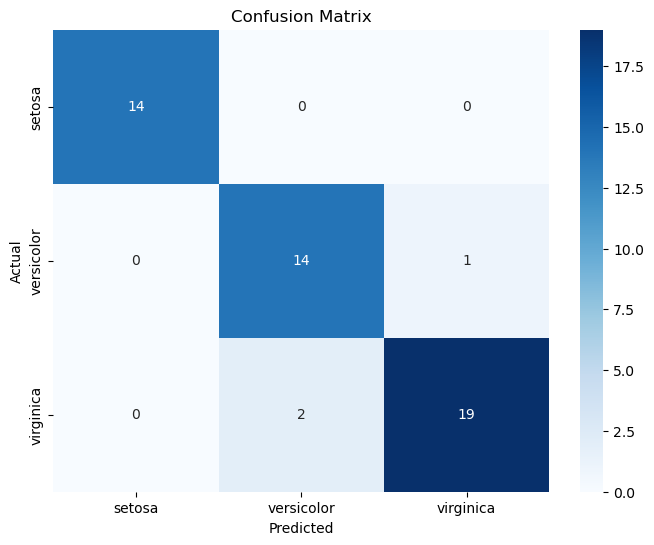

In [14]:
# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## KFold Cross Validation
Takes 1/n of the data for testing and the other training.

In [15]:
kf = model_selection.KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(iris_df):
    #print(train_index[:6], test_index[:6])
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("f1: ", metrics.f1_score(y_test, y_pred, average="weighted"))


f1:  0.9336363636363636
f1:  0.9674571805006589
f1:  0.966750208855472
f1:  0.9333333333333333
f1:  0.9333333333333333


### Shorthand way of doing K folds and use decision tree classifier model 

In [16]:
scores = model_selection.cross_validate(clf, X, y, cv=5,
                                        scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"]) #cv is the folds

In [17]:
scores

{'fit_time': array([0.00199819, 0.00125813, 0.00109196, 0.00106764, 0.00121999]),
 'score_time': array([0.01375103, 0.00360799, 0.00453091, 0.00295615, 0.0032239 ]),
 'test_accuracy': array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ]),
 'test_precision_weighted': array([0.96969697, 0.96969697, 0.9023569 , 1.        , 1.        ]),
 'test_recall_weighted': array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ]),
 'test_f1_weighted': array([0.96658312, 0.96658312, 0.89974937, 1.        , 1.        ])}

In [18]:
np.mean(scores["test_f1_weighted"])

0.9665831244778612